# 一些不愉快的货币主义算术

## 概述

本讲座基于 {doc}`money_inflation` 中引入的概念和问题。

那个讲座描述了揭示通货膨胀税率和关联的货币收益率的静止均衡 [*拉弗曲线*](https://en.wikipedia.org/wiki/Laffer_curve)。

在这次讲座中，我们研究一个在日期 $T > 0$ 之后占优的静止均衡的情况，但在那之前并非如此。

对于 $t=0, \ldots, T-1$，货币供应、价格水平和计息政府债务沿着一个在 $t=T$ 结束的过渡路径变化。

在这个过渡期间，实际余额 $\frac{m_{t+1}}{p_t}$ 与在时间 $t$ 到期的一期政府债券 $\tilde{R} B_{t-1}$ 的比率每个期间都在减少。

这对于必须通过印制货币来融资的 **息前** 政府赤字在 $t \geq T$ 时期有影响。

关键的 **货币与债券** 比率只在时间 $T$ 及之后稳定。

并且 $T$ 越大，在 $t \geq T$ 时期必须通过印制货币来融资的息前政府赤字就越大。

这些结果是 Sargent 和 Wallace 的“不愉快的货币主义算术” {cite}`sargent1981` 的基本发现。

那次讲座描述了在讲座中出现的货币供应和需求。

它还描述了我们在本讲座中从中向后工作的稳态均衡。

除了学习“不愉快的货币主义算术”，在这次讲座中，我们还将学习如何实施一个用于计算初始价格水平的 [*不动点*](https://en.wikipedia.org/wiki/Fixed_point_(mathematics)) 算法。

## 设置

让我们从快速回顾一下 {doc}`money_inflation` 中提到的模型组件开始。

请查阅那篇讲义以获取更多详情和我们在此讲义中也将使用的Python代码。

对于 $t \geq 1$，**实际余额** 按照以下方式变化

$$
\frac{m_{t+1}}{p_t} - \frac{m_{t}}{p_{t-1}} \frac{p_{t-1}}{p_t} = g
$$

或者

$$
b_t - b_{t-1} R_{t-1} = g
$$ (eq:up_bmotion)

其中

* $b_t = \frac{m_{t+1}}{p_t}$ 是第 $t$ 期末的实际余额
* $R_{t-1} = \frac{p_{t-1}}{p_t}$ 是从 $t-1$ 到 $t$ 期间实际余额的毛收益率

对实际余额的需求是

$$
b_t = \gamma_1 - \gamma_2 R_t^{-1} .
$$ (eq:up_bdemand)

其中 $\gamma_1 > \gamma_2 > 0$.

## 货币-财政政策

在{doc}`money_inflation`的基本模型上，我们增加了通胀指数化的一期政府债券作为政府筹集财政支出的另一种方式。

设 $\widetilde R > 1$ 为政府一期通胀指数化债券的恒定名义回报率。

有了这个额外的资金来源，政府在时间 $t \geq 0$ 的预算约束现在是

$$
B_t + \frac{m_{t+1}}{p_t} = \widetilde R B_{t-1} + \frac{m_t}{p_t} + g
$$ 

在时间 $0$ 开始之前，公众拥有 $\check m_0$ 单位的货币（以美元计）和 $\widetilde R \check B_{-1}$ 单位的一期指数化债券（以时间 $0$ 的商品计算）；这两个数量是模型外设定的初始条件。

注意 $\check m_0$ 是一个 *名义* 数量，以美元计算，而 $\widetilde R \check B_{-1}$ 是一个 *实际* 数量，以时间 $0$ 的商品计算。

### 公开市场操作

在时间 $0$，政府可以重新安排其债务投资组合，并受以下约束（关于公开市场操作）：

$$
\widetilde R B_{-1} + \frac{m_0}{p_0} = \widetilde R \check B_{-1} + \frac{\check m_0}{p_0}
$$

或

$$
B_{-1} - \check B_{-1} = \frac{1}{p_0 \widetilde R} \left( \check m_0 - m_0 \right)  
$$ (eq:openmarketconstraint)

该方程表明，政府（例如中央银行）可以通过*增加* $B_{-1}$ 相对于 $\check B_{-1}$ 来*减少* $m_0$ 相对于 $\check m_0$。

这是中央银行[**公开市场操作**](https://www.federalreserve.gov/monetarypolicy/openmarket.htm)的一个标准约束版本，在此操作中，它通过从公众那里购买政府债券来扩大货币供应量。

## 在 $t=0$ 进行公开市场操作

遵循 Sargent 和 Wallace {cite}`sargent1981` 的分析，我们研究央行利用公开市场操作在持续的财政赤字情况下降低物价水平的政策后果，这种财政赤字形式为正的 $g$。

在时间 $0$ 之前，政府选择 $(m_0, B_{-1})$，受约束
{eq}`eq:openmarketconstraint`。

对于 $t =0, 1, \ldots, T-1$，

$$
\begin{aligned}
B_t & = \widetilde R B_{t-1} + g \\
m_{t+1} &  = m_0 
\end{aligned}
$$

而对于 $t \geq T$，

$$
\begin{aligned}
B_t & = B_{T-1} \\
m_{t+1} & = m_t + p_t \overline g
\end{aligned}
$$

其中 

$$
\overline g = \left[(\widetilde R -1) B_{T-1} +  g \right]
$$ (eq:overlineg)

我们想计算在这一方案下的一个均衡 $\{p_t,m_t,b_t, R_t\}_{t=0}$ 序列，用于执行货币和财政政策。

这里，**财政政策** 我们指的是一系列行动，决定一系列净利息政府赤字 $\{g_t\}_{t=0}^\infty$，这必须通过向公众发行货币或有息债券来融资。

通过 **货币政策** 或 **债务管理政策**，我们指的是一系列行动，决定政府如何在有息部分（政府债券）和无息部分（货币）之间分配对公众的债务组合。

通过一个 **公开市场操作**，我们指的是政府的货币政策行动，其中政府（或其代表，比如中央银行）要么用新发行的货币从公众购买政府债券，要么向公众出售债券并收回其从公众流通中得到的货币。

## 算法（基本思想）

从 $t=T$ 向后工作，首先计算与低通胀、低通胀税率平稳状态平衡相关的 $p_T, R_u$，如 {doc}`money_inflation_nonlinear` 中所述。

首先开始我们的算法描述，回忆一下货币利率 $\bar R$ 解决的二次方程很有用

$$
-\gamma_2 + (\gamma_1 + \gamma_2 - \overline g) \bar R - \gamma_1 \bar R^2 = 0
$$ (eq:up_steadyquadratic)

二次方程 {eq}`eq:up_steadyquadratic` 有两个根，$R_l < R_u < 1$。

如 {doc}`money_inflation` 末尾描述，我们选择较大的根 $R_u$。

接下来，我们计算

$$
\begin{aligned}
R_T & = R_u \cr
b_T & = \gamma_1 - \gamma_2 R_u^{-1} \cr
p_T & = \frac{m_0}{\gamma_1 - \overline g - \gamma_2 R_u^{-1}}
\end{aligned}
$$ (eq:LafferTstationary)

我们可以通过连续解方程 {eq}`eq:up_bmotion` 和 {eq}`eq:up_bdemand` 来计算持续序列 $\{R_t, b_t\}_{t=T+1}^\infty$ 的回报率和实际余额，这些回报率和实际余额与一个平衡状态相关，对于 $t \geq 1$：

$$
\begin{aligned}
b_t & = b_{t-1} R_{t-1} + \overline g \cr
R_t^{-1} & = \frac{\gamma_1}{\gamma_2} - \gamma_2^{-1} b_t \cr
p_t & = R_t p_{t-1} \cr
m_t & = b_{t-1} p_t 
\end{aligned}
$$

## 在时间 $T$ 之前

定义

$$
\lambda \equiv \frac{\gamma_2}{\gamma_1}.
$$

我们的限制 $\gamma_1 > \gamma_2 > 0$ 暗示 $\lambda \in [0,1)$。

我们想要计算

$$ 
\begin{aligned}
p_0 & = \gamma_1^{-1} \left[ \sum_{j=0}^\infty \lambda^j m_{j} \right] \cr
& = \gamma_1^{-1} \left[ \sum_{j=0}^{T-1} \lambda^j m_{0} + \sum_{j=T}^\infty \lambda^j m_{1+j} \right]
\end{aligned}
$$

因此，

$$
\begin{aligned}
p_0 & = \gamma_1^{-1} m_0  \left\{ \frac{1 - \lambda^T}{1-\lambda} +  \frac{\lambda^T}{R_u-\lambda}    \right\} \cr
p_1 & = \gamma_1^{-1} m_0  \left\{ \frac{1 - \lambda^{T-1}}{1-\lambda} +  \frac{\lambda^{T-1}}{R_u-\lambda}    \right\} \cr
\quad \dots  & \quad \quad \dots \cr
p_{T-1} & = \gamma_1^{-1} m_0  \left\{ \frac{1 - \lambda}{1-\lambda} +  \frac{\lambda}{R_u-\lambda}    \right\}  \cr
p_T & = \gamma_1^{-1} m_0  \left\{\frac{1}{R_u-\lambda}   \right\}
\end{aligned}
$$ (eq:allts)

我们可以通过迭代以下公式来实现前述公式：

$$
p_t = \gamma_1^{-1} m_0 + \lambda p_{t+1}, \quad t = T-1, T-2, \ldots, 0
$$

从

$$
p_T =    \frac{m_0}{\gamma_1 - \overline g - \gamma_2 R_u^{-1}}  = \gamma_1^{-1} m_0  \left\{\frac{1}{R_u-\lambda} \right\}
$$ (eq:pTformula)

```{prf:remark}
可以通过回想 $R_u$ 是二次方程 {eq}`eq:up_steadyquadratic` 的根，该方程确定了货币的稳定状态回报率，从而验证 {eq}`eq:pTformula` 右侧两个公式的等价性。
```

## 算法（伪代码）

现在我们更详细地以伪代码形式描述一个计算算法，因为它接近我们可以提供给Python编程者的一组指令。

为了计算一个均衡，我们使用以下算法。

```{prf:algorithm}
给定 *参数* 包括 $g, \check m_0, \check B_{-1}, \widetilde R >1, T $。

我们定义一个从 $p_0$ 到 $\widehat p_0$ 的映射，如下。

* 设置 $m_0$，然后计算 $B_{-1}$ 以满足时间 $0$ **公开市场操作的** 约束

$$
B_{-1}- \check B_{-1} = \frac{\widetilde R}{p_0} \left( \check m_0 - m_0 \right)
$$

* 从以下公式计算 $B_{T-1}$

$$
B_{T-1} = \widetilde R^T B_{-1} + \left( \frac{1 - \widetilde R^T}{1-\widetilde R} \right) g
$$

* 计算 

$$
\overline g = g + \left[ \widetilde R - 1 \right] B_{T-1}
$$

* 从公式 {eq}`eq:up_steadyquadratic` 和 {eq}`eq:LafferTstationary` 计算 $R_u, p_T$

* 从公式 {eq}`eq:allts` 计算新的 $p_0$ 估计值，称为 $\widehat p_0$

* 注意前面的步骤定义了一个映射

$$
\widehat p_0 = {\mathcal S}(p_0)
$$

* 我们寻找 ${\mathcal S}$ 的不动点，即解 $p_0 = {\mathcal S}(p_0)$。

* 通过迭代收敛的松弛算法计算不动点

$$
p_{0,j+1} = (1-\theta)  {\mathcal S}(p_{0,j})  + \theta  p_{0,j}, 
$$

其中 $\theta \in [0,1)$ 是一个松弛参数。
```

## 示例计算

我们将模型参数设置为，在时间 $T$ 后的稳态初始和 {doc}`money_inflation_nonlinear` 中的相同。

特别是设置 $\gamma_1=100, \gamma_2 =50, g=3.0$。在那次讲座中，我们设置 $m_0 = 100$，
但现在相应的将是 $M_T$，它是内生的。

对于新参数，我们将设置 $\tilde R = 1.01, \check B_{-1} = 0, \check m_0 = 105, T = 5$。

我们将通过设置 $m_0 = 100$ 来研究一个“小型”公开市场操作。

这些参数设置意味着，在时间 $0$ 之前，“中央银行”以 $\check m_0 - m_0 = 5$ 货币单位换取了公众的债券。

这使得公众持有更少的货币但更多的政府有息债券。

由于公众持有的货币较少（供应减少），可以合理预见时间 $0$ 的价格水平将受到向下推动。

但这还不是故事的终点，因为时间 $0$ 的这次**公开市场操作**对未来 $m_{t+1}$ 和名义政府赤字 $\bar g_t$ 的设置产生了影响。

让我们开始一些导入：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

现在让我们开始实现我们的伪代码用 Python。

In [2]:
# 创建一个包含参数的命名元组
MoneySupplyModel = namedtuple("MoneySupplyModel", 
                              ["γ1", "γ2", "g",
                               "R_tilde", "m0_check", "Bm1_check",
                               "T"])

def create_model(γ1=100, γ2=50, g=3.0,
                 R_tilde=1.01,
                 Bm1_check=0, m0_check=105,
                 T=5):
    
    return MoneySupplyModel(γ1=γ1, γ2=γ2, g=g,
                            R_tilde=R_tilde,
                            m0_check=m0_check, Bm1_check=Bm1_check,
                            T=T)

In [3]:
msm = create_model()

In [4]:
def S(p0, m0, model):

    # 解包参数
    γ1, γ2, g = model.γ1, model.γ2, model.g
    R_tilde = model.R_tilde
    m0_check, Bm1_check = model.m0_check, model.Bm1_check
    T = model.T

    # 开放市场操作
    Bm1 = 1 / (p0 * R_tilde) * (m0_check - m0) + Bm1_check

    # 计算 B_{T-1}
    BTm1 = R_tilde ** T * Bm1 + ((1 - R_tilde ** T) / (1 - R_tilde)) * g

    # 计算 g bar
    g_bar = g + (R_tilde - 1) * BTm1

    # 解二次方程
    Ru = np.roots((-γ1, γ1 + γ2 - g_bar, -γ2)).max()

    # 计算 p0
    λ = γ2 / γ1
    p0_new = (1 / γ1) * m0 * ((1 - λ ** T) / (1 - λ) + λ ** T / (Ru - λ))

    return p0_new

In [5]:
def compute_fixed_point(m0, p0_guess, model, θ=0.5, tol=1e-6):

    p0 = p0_guess
    error = tol + 1

    while error > tol:
        p0_next = (1 - θ) * S(p0, m0, model) + θ * p0

        error = np.abs(p0_next - p0)
        p0 = p0_next

    return p0

让我们看看在静态$R_u$均衡中，价格水平$p_0$如何依赖于初始货币供应量$m_0$。

注意$p_0$作为$m_0$的函数的斜率是恒定的。

这个结果表明，我们的模型验证了一种货币数量论的结果，
这是Sargent和Wallace {cite}`sargent1981`在其模型中特意构建的，以证明其标题中“货币主义者”这一形容词。

In [6]:
m0_arr = np.arange(10, 110, 10)

Font 'default' does not have a glyph for '\u521d' [U+521d], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8d27' [U+8d27], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5e01' [U+5e01], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4f9b' [U+4f9b], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5e94' [U+5e94], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u91cf' [U+91cf], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4ef7' [U+4ef7], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u683c' [U+683c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6c34' [U+6c34], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5e73' [U+5e73], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u521d' [U+521d], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8d27' [U+8d27], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5e01' [U+5e01], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4f9b' [U+4f9b], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5e94' [U+5e94], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u91cf' [U+91cf], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4ef7' [U+4ef7], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u683c' [U+683c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6c34' [U+6c34], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5e73' [U+5e73], substituting with a dummy symbol.


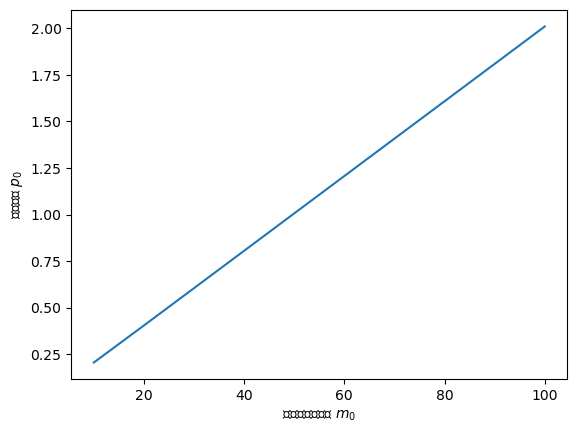

In [7]:
plt.plot(m0_arr, [compute_fixed_point(m0, 1, msm) for m0 in m0_arr])

plt.ylabel('价格水平 $p_0$')
plt.xlabel('初始货币供应量 $m_0$')

plt.show()

现在让我们编写并实现代码，以便我们可以试验前面描述的时刻 $0$ 的公开市场操作。

In [8]:
def simulate(m0, model, length=15, p0_guess=1):
    # 解包参数
    γ1, γ2, g = model.γ1, model.γ2, model.g
    R_tilde = model.R_tilde
    m0_check, Bm1_check = model.m0_check, model.Bm1_check
    T = model.T

    # (pt, mt, bt, Rt)
    路径 = np.empty((4, length))

    # 开市操作
    p0 = compute_fixed_point(m0, 1, model)
    Bm1 = 1 / (p0 * R_tilde) * (m0_check - m0) + Bm1_check
    BTm1 = R_tilde ** T * Bm1 + ((1 - R_tilde ** T) / (1 - R_tilde)) * g
    g_bar = g + (R_tilde - 1) * BTm1
    Ru = np.roots((-γ1, γ1 + γ2 - g_bar, -γ2)).max()

    λ = γ2 / γ1

    # t = 0
    路径[0, 0] = p0
    路径[1, 0] = m0

    # 1 <= t <= T
    for t in range(1, T+1, 1):
        路径[0, t] = (1 / γ1) * m0 *                       ((1 - λ ** (T - t)) / (1 - λ)
                       + (λ ** (T - t) / (Ru - λ)))
        路径[1, t] = m0

    # t > T
    for t in range(T+1, length):
        路径[0, t] = 路径[0, t-1] / Ru
        路径[1, t] = 路径[1, t-1] + 路径[0, t] * g_bar

    # Rt = pt / pt+1
    路径[3, :T] = 路径[0, :T] / 路径[0, 1:T+1]
    路径[3, T:] = Ru

    # bt = γ1 - γ2 / Rt
    路径[2, :] = γ1 - γ2 / 路径[3, :]

    return 路径

In [9]:
def plot_path(m0_arr, model, length=15):

    fig, axs = plt.subplots(2, 2, figsize=(8, 5))
    titles = ['$p_t$', '$m_t$', '$b_t$', '$R_t$']
    
    for m0 in m0_arr:
        路径 = simulate(m0, model, length=length)
        for i, ax in enumerate(axs.flat):
            ax.plot(路径[i])
            ax.set_title(titles[i])
    
    axs[0, 1].hlines(model.m0_check, 0, length, color='r', linestyle='--')
    axs[0, 1].text(length * 0.8, model.m0_check * 0.9, '$\check{m}_0$')
    plt.show()

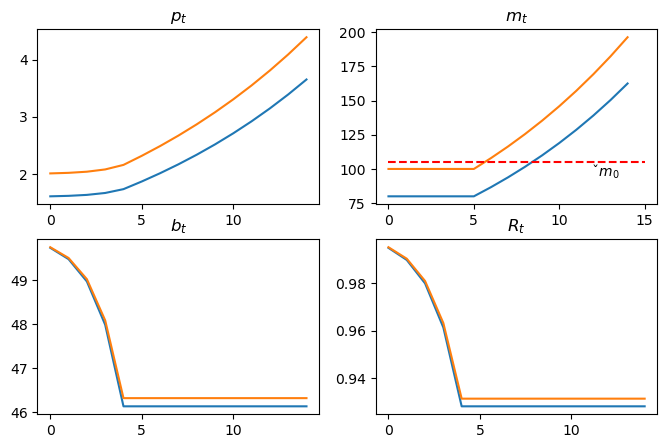

In [10]:
plot_path([80, 100], msm)

{numref}`fig:unpl1` 总结了两个实验结果，这些结果传达了 Sargent 和 Wallace {cite}`sargent1981` 的信息。

* 在时间 $t=0$ 进行的公开市场操作减少了货币供应，导致当时的价格水平下降

* 在时间 $0$ 进行的公开市场操作后货币供应量越低，价格水平越低。

* 在时间 $0$ 减少公开市场操作后的货币供应量的公开市场操作，也会*降低*时间 $t \geq T$ 的货币回报率 $R_u$，因为它带来了更高的政府借贷需通过印钞（即征收通货膨胀税）在时间 $t \geq T$ 来融资。

* $R$ 在维持货币稳定和处理政府赤字引起的通货膨胀后果的背景下非常重要。因此，可能会选择较大的 $R$ 来减轻因通货膨胀造成的实际回报率的负面影响。